
-------------------------
Beginning Policy Iteration
-------------------------

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode reward: 1.000000

-------------------------
Beginning Value Iteration
-------------------------

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode reward: 1.000000


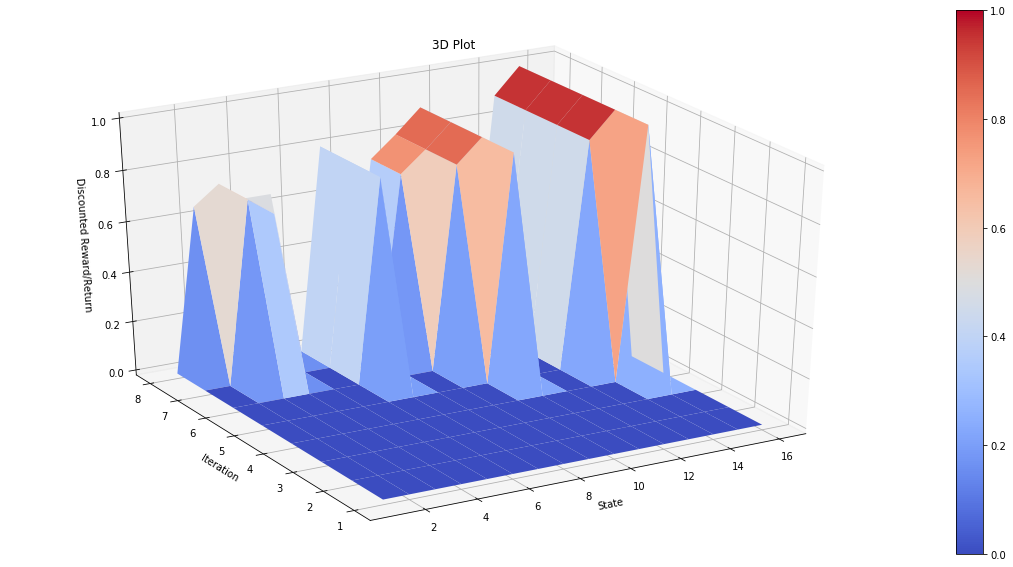

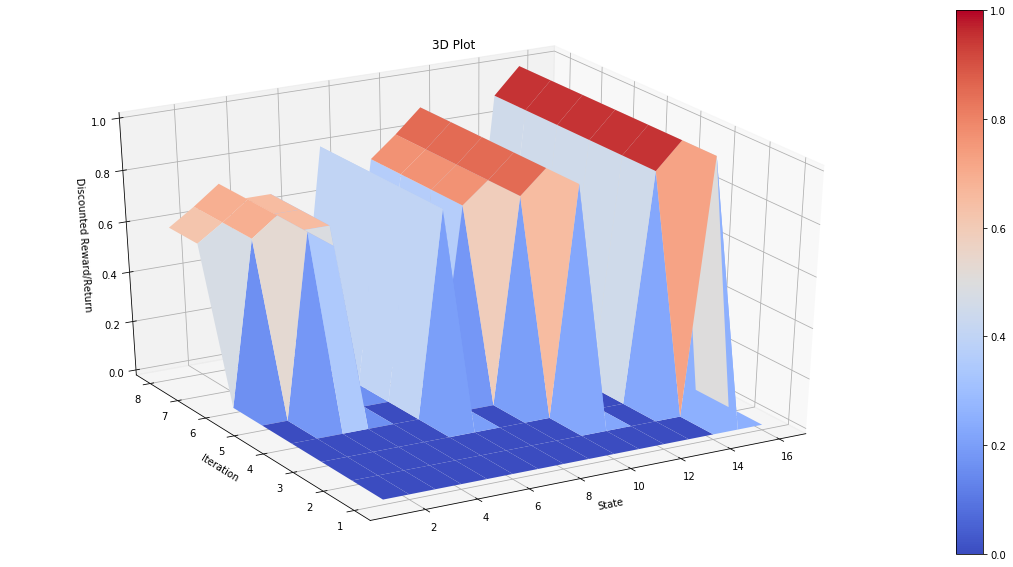

In [5]:
### MDP Value Iteration and Policy Iteration
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import gym
import time
from lake_envs import *

np.set_printoptions(precision=3)

def policy_evaluation(P, nS, nA, policy, gamma=0.9, tol=1e-3):
    value_function = np.zeros(nS) 
    while True:
        delta = 0
        for s in range(nS):
            v = value_function[s]
            temp = P[s][policy[s]]
            new_value = 0
            for k in temp:
                new_value += k[0]*(k[2] + gamma*value_function[k[1]])
            value_function[s] = new_value
            delta = max(delta, abs(v - value_function[s]))
        if delta <= tol:
            break
    return value_function


def policy_improvement(P, nS, nA, value_from_policy, policy, gamma=0.9):
    new_policy = np.zeros(nS, dtype='int')
    for s in range(nS):
        old_action = policy[s]
        max_action = old_action
        max_action_value = 0 
        for k in (P[s][old_action]):
            max_action_value += k[0]*(k[2] + gamma*value_from_policy[k[1]])
        for a in range(nA):
            current_action_value = 0
            for k in (P[s][a]):
                current_action_value += k[0]*(k[2] + gamma*value_from_policy[k[1]])
            if current_action_value > max_action_value:
                max_action = a
                max_action_value = current_action_value
        new_policy[s] = max_action
    return new_policy


def policy_iteration(P, nS, nA, gamma=0.9, tol=10e-3):
    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)
    new_policy = np.zeros(nS, dtype=int)
    record = []
    record.append(value_function)
    while True:
        policy_stable = True
        value_function = policy_evaluation(P, nS, nA, policy)
        record.append(value_function)
        policy = new_policy.copy()
        value_from_policy = policy_evaluation(P, nS, nA, policy)
        new_policy = policy_improvement(P, nS, nA, value_from_policy, policy)
        
        for s in range(nS):
            if(policy[s] != new_policy[s]):
                policy_stable = False
                break      
        if policy_stable == True:
            break
    return value_function, new_policy, record


def value_iteration(P, nS, nA, gamma=0.9, tol=1e-3):
    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)
    new_policy = np.zeros(nS, dtype=int)
    record = []
    record.append(value_function.copy()) 
    while True:
        delta = 0
        policy = new_policy
        for s in range(nS):
            v = value_function[s]
            temp = P[s][policy[s]]
            old_action = policy[s]
            max_action_value = 0
            max_action = old_action
            for k in (P[s][old_action]):
                max_action_value += k[0]*(k[2] + gamma*value_function[k[1]])
            for a in range(nA):
                current_action_value = 0
                for k in (P[s][a]):
                    current_action_value += k[0]*(k[2] + gamma*value_function[k[1]])
                if current_action_value > max_action_value:
                    max_action_value = current_action_value
                    max_action = a
            value_function[s] = max_action_value
            new_policy[s] = max_action
            delta = max(delta, abs(v - value_function[s]))
        record.append(value_function.copy())
        if delta <= tol:
            break
        
    return value_function, new_policy, record

def render_single(env, policy, max_steps=100):
  """
    This function does not need to be modified
    Renders policy once on environment. Watch your agent play!

    Parameters
    ----------
    env: gym.core.Environment
      Environment to play on. Must have nS, nA, and P as
      attributes.
    Policy: np.array of shape [env.nS]
      The action to take at a given state
  """

  episode_reward = 0
  ob = env.reset()
  for t in range(max_steps):
    env.render()
    time.sleep(0.25)
    a = policy[ob]
    ob, rew, done, _ = env.step(a)
    episode_reward += rew
    if done:
      break
  env.render();
  if not done:
    print("The agent didn't reach a terminal state in {} steps.".format(max_steps))
  else:
      print("Episode reward: %f" % episode_reward)


def plot(V, nS):
    nIter = len(V)
    x_range = np.arange(1, nS + 1)
    y_range = np.arange(1, nIter + 1)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.apply_along_axis(lambda x: V[x[1] - 1][x[0] - 1], 2, np.dstack([X, Y]))
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('coolwarm'), vmax=1.0)
    ax.set_xlabel('State')
    ax.set_ylabel('Iteration')
    ax.set_zlabel('Discounted Reward/Return')
    ax.set_title('3D Plot')
    ax.view_init(30, 240)
    fig.colorbar(surf)

# Edit below to run policy and value iteration on different environments and
# visualize the resulting policies in action!
# You may change the parameters in the functions below
if __name__ == "__main__":

    # comment/uncomment these lines to switch between deterministic/stochastic environments
    env = gym.make("Deterministic-4x4-FrozenLake-v0")
#     env = gym.make("Stochastic-4x4-FrozenLake-v0")

    print("\n" + "-"*25 + "\nBeginning Policy Iteration\n" + "-"*25)

    V_pi, p_pi, record_pi = policy_iteration(env.P, env.nS, env.nA, gamma=0.9, tol=1e-3)
    render_single(env, p_pi, 100)
    plot(record_pi, env.nS)
    # print(V_pi)
    # print(p_pi)
    print("\n" + "-"*25 + "\nBeginning Value Iteration\n" + "-"*25)

    V_vi, p_vi, record_vi = value_iteration(env.P, env.nS, env.nA, gamma=0.9, tol=1e-3)
    render_single(env, p_vi, 100)
    # print(V_pi)
    # print(p_pi)
    plot(record_vi, env.nS)